In [549]:
import math
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.date_util import parse_and_format_dates
import plotly.graph_objects as go

In [550]:
df_2013_2021 = pd.read_csv("kalimati_tarkari_dataset_cleaned.csv")
df_2021_2023 = pd.read_csv("kalimati-tarkari-prices-from-may-2021-to-september-2023.csv")
df_2023_now = pd.read_csv("kalimati_tarkari_2023_09_28_2025_06_29.csv")

In [551]:
df_2013_2021.columns

Index(['SN', 'Commodity', 'Date', 'Unit', 'Minimum', 'Maximum', 'Average'], dtype='object')

In [552]:
df_2032_2023.columns

Index(['Tomato Big(Nepali)', '1/5/2021', 'Kg', '50', '60', '55'], dtype='object')

In [553]:
df_2023_now.columns

Index(['Date', 'Product', 'Unit', 'Max Price', 'Min Price', 'Avg Price'], dtype='object')

In [554]:
# Removing SN columns for old dataframe
df_2013_2021.drop(columns=['SN'], inplace=True, axis=1)
df_2032_2023

,Tomato Big(Nepali),1/5/2021,Kg,50,60,55
0,Tomato Big(Indian),1/5/2021,Kg,50,60,55
1,Tomato Small(Local),1/5/2021,Kg,30,35,32.5
2,Tomato Small(Tunnel),1/5/2021,Kg,30,35,32.5
3,Tomato Small(Indian),1/5/2021,KG,40,45,42.5
4,Tomato Small(Terai),1/5/2021,KG,40,45,42.5
...,...,...,...,...,...,...
96474,Tomato Small(Indian),2023-09-28,KG,Rs 45.00,Rs 55.00,Rs 50.00
96475,Tomato Small(Local),2023-09-28,KG,Rs 50.00,Rs 60.00,Rs 55.00
96476,Tomato Small(Tunnel),2023-09-28,KG,Rs 60.00,Rs 75.00,Rs 69.00
96477,Turnip A,2023-09-28,KG,Rs 70.00,Rs 80.00,Rs 75.00


In [555]:
df_2021_2023.columns = df_2013_2021.columns
df_merged_initial = pd.concat([df_2013_2021, df_2021_2023], ignore_index=True)

In [556]:
print(f"{len(df_2013_2021)} + {len(df_2021_2023)} = {len(df_merged_initial)} items")

197161 + 96479 = 293640 items


## Merging with extracted Data from 2023-09-30 (Today)

In [557]:
print(f"Info \n{df_2023_now.info}")
print(f"Is Nan \n{df_2023_now.isna().sum()}")


Info 
<bound method DataFrame.info of              Date             Product  Unit  Max Price  Min Price  Avg Price
0      2023-09-29  Tomato Big(Indian)    KG       50.0       40.0      43.75
1      2023-09-29               Lemon    KG       60.0       50.0      56.67
2      2023-09-29    Cucumber(Hybrid)    KG       35.0       30.0      32.50
3      2023-09-29     Cucumber(Local)    KG       70.0       60.0      65.00
4      2023-09-29           Pineapple  1 Pc      200.0      180.0     190.00
...           ...                 ...   ...        ...        ...        ...
62678  2025-06-29        Bottle Gourd    KG       30.0       20.0      26.00
62679  2025-06-29        Bitter Gourd    KG       40.0       30.0      36.00
62680  2025-06-29      Soyabean Green    KG      120.0      100.0     113.00
62681  2025-06-29               Neuro    KG       60.0       50.0      55.00
62682  2025-06-29  Fish Fresh(Chhadi)    KG      240.0      220.0     230.00

[62683 rows x 6 columns]>
Is Nan 
Dat

In [558]:
desired_column_orders = ["Date", "Commodity", "Unit", "Maximum", "Minimum", "Average"]
df_merged_initial = df_merged_initial[desired_column_orders]


In [559]:
df_2023_now = df_2023_now.rename(columns={
    'Product': 'Commodity',
    'Max Price': 'Maximum',
    'Min Price': 'Minimum',
    'Avg Price': 'Average'
})

In [560]:
print(df_merged_initial.columns)
print(df_2023_now.columns)

Index(['Date', 'Commodity', 'Unit', 'Maximum', 'Minimum', 'Average'], dtype='object')
Index(['Date', 'Commodity', 'Unit', 'Maximum', 'Minimum', 'Average'], dtype='object')


In [561]:
df_merged = pd.concat([df_merged_initial, df_2023_now], ignore_index=True)
df_merged.head()

,Date,Commodity,Unit,Maximum,Minimum,Average
0,2013-06-16,Tomato Big(Nepali),Kg,40.0,35.0,37.5
1,2013-06-16,Tomato Small(Local),Kg,32.0,26.0,29.0
2,2013-06-16,Potato Red,Kg,21.0,20.0,20.5
3,2013-06-16,Potato White,Kg,16.0,15.0,15.5
4,2013-06-16,Onion Dry (Indian),Kg,30.0,28.0,29.0


In [562]:
print(f"{len(df_2013_2021)} + {len(df_2021_2023)} + {len(df_2023_now) } = {len(df_merged)} items")


197161 + 96479 + 62683 = 356323 items


In [563]:
df_merged.info

<bound method DataFrame.info of               Date            Commodity Unit Maximum Minimum Average
0       2013-06-16   Tomato Big(Nepali)   Kg    40.0    35.0    37.5
1       2013-06-16  Tomato Small(Local)   Kg    32.0    26.0    29.0
2       2013-06-16           Potato Red   Kg    21.0    20.0    20.5
3       2013-06-16         Potato White   Kg    16.0    15.0    15.5
4       2013-06-16   Onion Dry (Indian)   Kg    30.0    28.0    29.0
...            ...                  ...  ...     ...     ...     ...
356318  2025-06-29         Bottle Gourd   KG    30.0    20.0    26.0
356319  2025-06-29         Bitter Gourd   KG    40.0    30.0    36.0
356320  2025-06-29       Soyabean Green   KG   120.0   100.0   113.0
356321  2025-06-29                Neuro   KG    60.0    50.0    55.0
356322  2025-06-29   Fish Fresh(Chhadi)   KG   240.0   220.0   230.0

[356323 rows x 6 columns]>

In [564]:
# Checking NA and Null in data
print(f"NA Check : {df_merged.isna().sum()}")
print(f"Null Check : {df_merged.isnull().sum()}")


NA Check : Date         0
Commodity    0
Unit         0
Maximum      0
Minimum      0
Average      0
dtype: int64
Null Check : Date         0
Commodity    0
Unit         0
Maximum      0
Minimum      0
Average      0
dtype: int64


Neither null nor NA is present. The dataset is good.

# 1.4. Saving the final merged dataset

In [565]:
df_merged.to_csv("kalimati_tarkari_dataset_merged", index=False)

In [566]:
df_merged.describe()

,Date,Commodity,Unit,Maximum,Minimum,Average
count,356323,356323,356323,356323.0,356323.0,356323.0
unique,4367,138,6,496.0,473.0,2301.0
top,2023-03-14,Cauli Local,Kg,60.0,50.0,95.0
freq,115,4364,224228,21176.0,19262.0,14988.0


# 2.1. Cleaning Commodity column

In [567]:
# Checking unique values
df_merged['Commodity'].unique()

array(['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Potato Red',
       'Potato White', 'Onion Dry (Indian)', 'Carrot(Local)',
       'Cabbage(Local)', 'Cauli Local', 'Raddish Red',
       'Raddish White(Local)', 'Brinjal Long', 'Brinjal Round',
       'Cow pea(Long)', 'Green Peas', 'French Bean(Local)',
       'Soyabean Green', 'Bitter Gourd', 'Bottle Gourd',
       'Pointed Gourd(Local)', 'Snake Gourd', 'Smooth Gourd',
       'Sponge Gourd', 'Pumpkin', 'Squash(Long)', 'Turnip', 'Okara',
       'Christophine', 'Brd Leaf Mustard', 'Spinach Leaf', 'Cress Leaf',
       'Mustard Leaf', 'Fenugreek Leaf', 'Onion Green', 'Mushroom(Kanya)',
       'Asparagus', 'Neuro', 'Brocauli', 'Sugarbeet', 'Drumstick',
       'Red Cabbbage', 'Lettuce', 'Celery', 'Parseley', 'Fennel Leaf',
       'Mint', 'Turnip A', 'Tamarind', 'Bamboo Shoot', 'Tofu', 'Gundruk',
       'Apple(Jholey)', 'Banana', 'Lime', 'Pomegranate', 'Mango(Maldah)',
       'Grapes(Green)', 'Water Melon(Green)', 'Sweet Orange', 'Pineappl

In [568]:
# Converting to lowercase words
df_merged['Commodity'] = (df_merged['Commodity']
                          .str.lower()
                          .str.replace(r"[()]", " ", regex=True)
                          .str.replace(r"\s+", " ", regex=True)
                          .str.strip()
                          )
df_merged['Commodity'].unique()

array(['tomato big nepali', 'tomato small local', 'potato red',
       'potato white', 'onion dry indian', 'carrot local',
       'cabbage local', 'cauli local', 'raddish red',
       'raddish white local', 'brinjal long', 'brinjal round',
       'cow pea long', 'green peas', 'french bean local',
       'soyabean green', 'bitter gourd', 'bottle gourd',
       'pointed gourd local', 'snake gourd', 'smooth gourd',
       'sponge gourd', 'pumpkin', 'squash long', 'turnip', 'okara',
       'christophine', 'brd leaf mustard', 'spinach leaf', 'cress leaf',
       'mustard leaf', 'fenugreek leaf', 'onion green', 'mushroom kanya',
       'asparagus', 'neuro', 'brocauli', 'sugarbeet', 'drumstick',
       'red cabbbage', 'lettuce', 'celery', 'parseley', 'fennel leaf',
       'mint', 'turnip a', 'tamarind', 'bamboo shoot', 'tofu', 'gundruk',
       'apple jholey', 'banana', 'lime', 'pomegranate', 'mango maldah',
       'grapes green', 'water melon green', 'sweet orange', 'pineapple',
       'cucu

In [569]:
all_words = [word for name in df_merged['Commodity'].unique() for word in name.lower().split()]
word_counts = Counter(all_words)

for word, count in word_counts.most_common():
    print(f"{word}: {count}")

green: 12
local: 11
tomato: 7
indian: 7
gourd: 7
dry: 6
leaf: 6
potato: 5
red: 5
chilli: 5
fish: 5
fresh: 5
terai: 5
nepali: 4
small: 4
bean: 4
mango: 4
white: 3
onion: 3
cabbage: 3
cauli: 3
raddish: 3
long: 3
french: 3
melon: 3
sweet: 3
orange: 3
garlic: 3
chinese: 3
hybrid: 3
big: 2
carrot: 2
brinjal: 2
round: 2
pointed: 2
squash: 2
turnip: 2
mustard: 2
mushroom: 2
apple: 2
lime: 2
grapes: 2
water: 2
cucumber: 2
papaya: 2
clive: 2
pear: 2
litchi: 2
cow: 1
pea: 1
peas: 1
soyabean: 1
bitter: 1
bottle: 1
snake: 1
smooth: 1
sponge: 1
pumpkin: 1
okara: 1
christophine: 1
brd: 1
spinach: 1
cress: 1
fenugreek: 1
kanya: 1
asparagus: 1
neuro: 1
brocauli: 1
sugarbeet: 1
drumstick: 1
cabbbage: 1
lettuce: 1
celery: 1
parseley: 1
fennel: 1
mint: 1
a: 1
tamarind: 1
bamboo: 1
shoot: 1
tofu: 1
gundruk: 1
jholey: 1
banana: 1
pomegranate: 1
maldah: 1
pineapple: 1
jack: 1
fruit: 1
sugarcane: 1
ginger: 1
capsicum: 1
coriander: 1
arum: 1
maize: 1
guava: 1
mombin: 1
barela: 1
lemon: 1
sword: 1
bakula: 1
ya

#### 2.1. Converting two words into a single word

In [570]:
df_2023_now['Commodity'].unique()

array(['Tomato Big(Indian)', 'Lemon', 'Cucumber(Hybrid)',
       'Cucumber(Local)', 'Pineapple', 'Mandarin', 'Sweet Orange',
       'Water Melon(Green)', 'Orange(Indian)', 'Grapes(Black)',
       'Pear(Chinese)', 'Pomegranate', 'Banana', 'Apple(Fuji)', 'Gundruk',
       'Tofu', 'Bamboo Shoot', 'Tamarind', 'Turnip A', 'Mint', 'Parseley',
       'Lime', 'Celery', 'Papaya(Indian)', 'Mombin',
       'Fish Fresh(Mungari)', 'Fish Fresh(Chhadi)', 'Fish Fresh(Bachuwa)',
       'Fish Fresh(Rahu)', 'Clive Dry', 'Garlic Dry Nepali',
       'Garlic Dry Chinese', 'Coriander Green', 'Garlic Green', 'Guava',
       'Capsicum', 'Chilli Green(Machhe)', 'Chilli Green(Bullet)',
       'Chilli Green', 'Chilli Dry', 'Ginger', 'Amla', 'Avocado',
       'Sarifa', 'Kiwi', 'Chilli Green(Akbare)', 'Lettuce', 'Pear(Local)',
       'Sugarbeet', 'French Bean(Hybrid)', 'French Bean(Local)',
       'Cowpea(Short)', 'Cow pea(Long)', 'Brinjal Round', 'Brinjal Long',
       'Raddish White(Hybrid)', 'Raddish White(Local

In [571]:
def replace_commodity_names(series):
    replacements = {
        "water melon": "watermelon",
        "jack fruit": "jack_fruit",
        "bamboo shoot": "bamboo_shoot",
        "spinach leaf": "spinach_leaf",
        "bitter gourd": "bitter_gourd",
        "sweet potato": "sweet_potato",
        "mustard leaf": "mustard_leaf",
        "cress leaf": "cress_leaf",
        "fenugreek leaf": "fenugreek_leaf",
        "fennel leaf": "fennel_leaf",
        "sponge gourd": "sponge_gourd",
        "sweet lime": "sweet_lime",
        "smooth gourd": "smooth_gourd",
        "bottle gourd": "bottle_gourd",
        "snake gourd": "snake_gourd",
        "sword bean": "sword_bean",
        "musk melon": "musk_melon",
        "tree tomato": "tree_tomato",
        "bauhania flower": "bauhania_flower",
        "brd leaf mustard": "brd_leaf_mustard",
        "cow pea": "cow_pea",
        "cowpea": "cow_pea",
        "sweet orange": "orange",
        "fish fresh": "fish",
        "french bean rajma": "french bean_rajma",
        "knolkhol": "knol_khol",
        "king oyster": "king_oyster",
        "lentinula edodes": "lentinula_edodes",
    }
    for old, new in replacements.items():
        series = series.str.replace(old, new, regex=False)
    return series


df_merged['Commodity'] = replace_commodity_names(df_merged['Commodity'])


#### 2.2. Removing the typo error

In [572]:
df_merged['Commodity'] = df_merged['Commodity'].str.replace("red cabbbage", "red cabbage", regex=False)

In [573]:
# Names
NAMES = {
    'tomato', 'potato', 'onion', 'carrot', 'cabbage', 'cauli', 'raddish',
    'brinjal', 'cow_pea', 'bean', 'soyabean', 'bitter_gourd',
    'bottle_gourd', 'pointed_gourd', 'snake_gourd', 'smooth_gourd',
    'sponge gourd', 'pumpkin', 'squash', 'turnip', 'okara', 'christophine',
    'mustard_leaf', 'spinach_leaf', 'cress_leaf', 'fenugreek_leaf', 'fennel_leaf',
    'mushroom', 'asparagus', 'neuro', 'brocauli', 'sugarbeet', 'drumstick',
    'lettuce', 'celery', 'parseley', 'mint', 'tamarind', 'bamboo_shoot',
    'tofu', 'gundruk', 'apple', 'banana', 'lime', 'pomegranate', 'mango',
    'grapes', 'watermelon', 'orange', 'pineapple', 'cucumber',
    'jack_fruit', 'papaya', 'sugarcane', 'ginger', 'chilli', 'capsicum',
    'garlic', 'coriander', 'clive', 'fish', 'arum', 'maize', 'sweet_lime',
    'guava', 'mombin', 'barela', 'lemon', 'sword bean', 'bakula', 'yam',
    'sweet potato', 'mandarin', 'knol_khol', 'kinnow', 'strawberry',
    'bauhania_flower', 'pear', 'litchi', 'musk_melon', 'kiwi', 'sarifa',
    'avocado', 'amla', 'tree tomato', 'peas', "sword_bean", "sweet_potato", "gourd", "bean_rajma",
    "brd_leaf_mustard", "sponge_gourd", "tree_tomato", "king_oyster", "lentinula_edodes"
}

# Colors
COLORS = {'red', 'white', 'green', 'black'}

# Location
LOCATIONS = {'local', 'indian', 'nepali', 'terai', 'chinese', "tunnel", "hybrid"}

# Types
TYPES = {'dry', 'kanya', 'jholey', 'maldah', 'dushari',
         'fuji', 'bullet', 'machhe', 'akbare', 'rahu', 'bachuwa', 'chhadi',
         'mungari', 'rajma', 'dotted', 'mude', 'calcutte', 'chousa',
         'jyapu', 'button', 'big', 'small', "smooth", "french", "short", "long", "round"}


def classify_products(data):
    """Parses commodity to separate the name, color, type and location columns"""

    names = []
    colors = []
    item_types = []
    locations = []

    for items in data:
        # print(f"Individual Item : {items}")

        words = items.split()
        # print(f"Separated Words : {words}")

        name = ""
        color = ""
        item_type = ""
        location = ""

        for word in words:
            # print(f"Word : {word}")

            if word == "a": continue

            # For Color
            if word in COLORS:
                color = word.strip()
                colors.append(color)
                # print(f"Appending color : {word} ")
                continue

            # For type
            if word in TYPES:
                item_type = word.strip()
                item_types.append(item_type)
                # print(f"Appending Type : {word}")
                continue

            # For location
            if word in LOCATIONS:
                location = word.strip()
                locations.append(location)
                # print(f"Appending Location : {word}")
                continue

            if word in NAMES:
                name = word.strip()
                names.append(name)
                # print(f"Appending Name : {word.strip()}")
                continue

        if (name.strip() == ""): print(f"Na name word is : {words}")
        if color.strip() == "": colors.append("NA")
        if item_type.strip() == "": item_types.append("NA")
        if location.strip() == "": locations.append("NA")
        if name.strip() == "": names.append("NA")

    #print(f"Names size : {len(names)}")
    #print(f"Colors size : {len(colors)}")
    #print(f"Types size : {len(item_types)}")
    #print(f"Locations size : {len(locations)}")

    #print(f"Types unique : {list(dict.fromkeys(item_types))}")

    return pd.DataFrame(
        {
            "name": names,
            "type": item_types,
            "color": colors,
            "location": locations,
        }
    )


df_classified = classify_products(df_merged["Commodity"])


In [574]:
df_merged = df_merged.rename(columns={'Commodity': 'name_original'})
desired_order = ["name_original", "name", "type", "color", "location"]
df_merged_remaining_columns = df_merged.columns.tolist()

df_merged_remaining_columns.remove("name_original")
new_column_order = desired_order + df_merged_remaining_columns

df_final = pd.concat([df_merged, df_classified], axis=1)
df_final = df_final[new_column_order]

#### 2.4. Converting columns to lowercase

In [575]:
df_final.columns = df_final.columns.str.lower()
df_final.describe()

,name_original,name,type,color,location,date,unit,maximum,minimum,average
count,356323,356323,356323,356323,356323,356323,356323,356323.0,356323.0,356323.0
unique,138,90,26,5,8,4367,6,496.0,473.0,2301.0
top,cauli local,chilli,NA,NA,NA,2023-03-14,Kg,60.0,50.0,95.0
freq,4364,14613,264419,295701,271794,115,224228,21176.0,19262.0,14988.0


#### 2.5. Making date format consistent YYYY-MM-DD and converting string to date object

In [576]:
df_final['date'] = parse_and_format_dates(df_final['date'])

#### 2.6. Convert to appropriate date type and final cleaning

In [577]:
## Creating all the required functions for cleaning
# 1. Convert to string
def clean_to_string(col):
    return col.astype(str)


# 2. Convert to date time
def convert_to_date_time(col):
    return pd.to_datetime(col, errors='coerce')


# 3. Remove currency Rs. and convert to float
def clean_price_and_format(col):
    items = []
    for item in col:
        item_str = str(item)
        new_item = item_str.replace("Rs.", "").replace("Rs .", "").replace("Rs", "").strip()
        items.append(float(new_item))
    return pd.Series(items)


# 4. Make unit consistent
def clean_unit_column(col):
    unit_map = {
        'KG': 'kg',
        'Kg': 'kg',
        'Doz': 'doz',
        'Per Dozen': 'doz',
        '1 Pc': 'pc',
        'Per Piece': 'pc',
    }
    return col.replace(unit_map).str.lower()


# 5. Replacing NA with np.nan
def replace_na_with_nan(col):
    return col.replace("NA", np.nan)


In [578]:
df_final['name_original'] = clean_to_string(df_final['name_original'])
df_final['name'] = clean_to_string(df_final['name'])
df_final['type'] = replace_na_with_nan(df_final['type'])
df_final['location'] = replace_na_with_nan(df_final['location'])
df_final['color'] = replace_na_with_nan(df_final['color'])
df_final['date'] = convert_to_date_time(df_final['date'])
df_final['minimum'] = clean_price_and_format(df_final['minimum'])
df_final['maximum'] = clean_price_and_format(df_final['maximum'])
df_final['average'] = clean_price_and_format(df_final['average'])
df_final['unit'] = clean_unit_column(df_final['unit'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356323 entries, 0 to 356322
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   name_original  356323 non-null  object        
 1   name           356323 non-null  object        
 2   type           91904 non-null   object        
 3   color          60622 non-null   object        
 4   location       84529 non-null   object        
 5   date           356323 non-null  datetime64[ns]
 6   unit           356323 non-null  object        
 7   maximum        356323 non-null  float64       
 8   minimum        356323 non-null  float64       
 9   average        356323 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 27.2+ MB


In [579]:
df_final.head()

,name_original,name,type,color,location,date,unit,maximum,minimum,average
0,tomato big nepali,tomato,big,NaN,nepali,2013-06-16,kg,40.0,35.0,37.5
1,tomato small local,tomato,small,NaN,local,2013-06-16,kg,32.0,26.0,29.0
2,potato red,potato,NaN,red,NaN,2013-06-16,kg,21.0,20.0,20.5
3,potato white,potato,NaN,white,NaN,2013-06-16,kg,16.0,15.0,15.5
4,onion dry indian,onion,dry,NaN,indian,2013-06-16,kg,30.0,28.0,29.0


In [580]:
df_final.duplicated().sum()

np.int64(12701)

In [590]:
df_final.to_csv("kalimati_tarkari_dataset_merged_cleaned.csv", index=False)

# 3. Analysis

In [582]:
df_final['average'].max()

np.float64(2900.0)

## 3.1. Distribution of average price

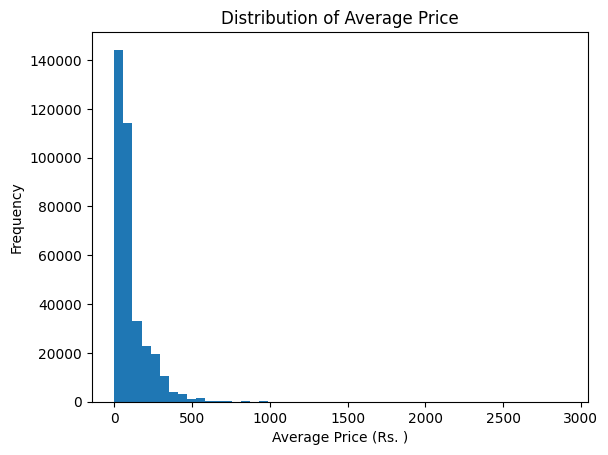

In [583]:
##  3.1. Price distribution Plot
plt.hist(df_final['average'], bins=50)
plt.title("Distribution of Average Price")
plt.xlabel("Average Price (Rs. )")
plt.ylabel("Frequency")
plt.show()

0         3.650658
1         3.401197
2         3.068053
3         2.803360
4         3.401197
            ...   
356318    3.295837
356319    3.610918
356320    4.736198
356321    4.025352
356322    5.442418
Name: average, Length: 356323, dtype: float64


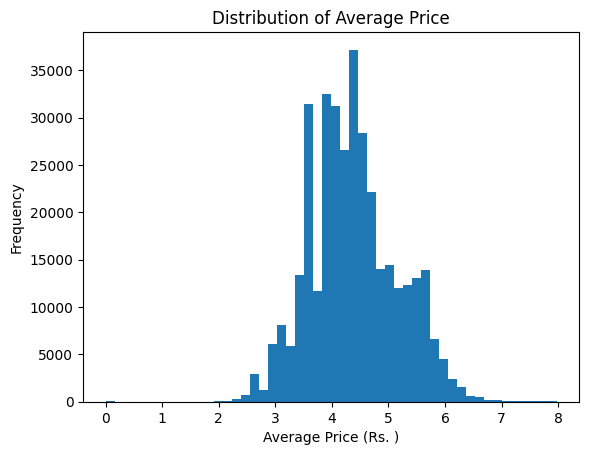

In [584]:
log_avg = np.log1p(df_final['average'])
print(log_avg)
plt.hist(log_avg, bins=50)
plt.title("Distribution of Average Price")
plt.xlabel("Average Price (Rs. )")
plt.ylabel("Frequency")
plt.show()

## 3.2. Time Series on all the products

In [585]:
df_final['year'] = df_final['date'].dt.year

In [586]:
df_yearly = df_final.groupby(['name', 'year'])['average'].mean().reset_index()


In [587]:
all_products = df_final["name"].unique()
print(all_products)

['tomato' 'potato' 'onion' 'carrot' 'cabbage' 'cauli' 'raddish' 'brinjal'
 'cow_pea' 'peas' 'bean' 'soyabean' 'bitter_gourd' 'bottle_gourd' 'gourd'
 'snake_gourd' 'smooth_gourd' 'sponge_gourd' 'pumpkin' 'squash' 'turnip'
 'okara' 'christophine' 'brd_leaf_mustard' 'spinach_leaf' 'cress_leaf'
 'mustard_leaf' 'fenugreek_leaf' 'mushroom' 'asparagus' 'neuro' 'brocauli'
 'sugarbeet' 'drumstick' 'lettuce' 'celery' 'parseley' 'fennel_leaf'
 'mint' 'tamarind' 'bamboo_shoot' 'tofu' 'gundruk' 'apple' 'banana' 'lime'
 'pomegranate' 'mango' 'grapes' 'watermelon' 'orange' 'pineapple'
 'cucumber' 'jack_fruit' 'papaya' 'sugarcane' 'ginger' 'chilli' 'capsicum'
 'garlic' 'coriander' 'clive' 'fish' 'arum' 'maize' 'sweet_lime' 'guava'
 'mombin' 'barela' 'lemon' 'sword_bean' 'bakula' 'yam' 'sweet_potato'
 'mandarin' 'knol_khol' 'kinnow' 'strawberry' 'bauhania_flower' 'pear'
 'litchi' 'musk_melon' 'bean_rajma' 'kiwi' 'sarifa' 'avocado' 'amla'
 'tree_tomato' 'lentinula_edodes' 'king_oyster']


In [588]:
products = df_yearly['name'].unique()

# Prepare traces for each product (but only show one initially)
traces = []
for i, product in enumerate(products):
    df_product = df_yearly[df_yearly['name'] == product]
    trace = go.Scatter(
        x=df_product['year'], y=df_product['average'],
        mode='lines+markers',
        name=product,
        visible=(i == 0)  # only first product visible initially
    )
    traces.append(trace)

# Create dropdown menu buttons
buttons = []
for i, product in enumerate(products):
    visible = [False] * len(products)
    visible[i] = True  # only show this product's trace
    button = dict(
        label=product,
        method='update',
        args=[{'visible': visible},
              {'title': f'Yearly Average Price Trend for {product}'}]
    )
    buttons.append(button)

layout = go.Layout(
    title=f'Yearly Average Price Trend for {products[0]}',
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.1,
        y=1,
        xanchor='left',
        yanchor='top'
    )],
    xaxis_title='Year',
    yaxis_title='Average Price (Rs.)'
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


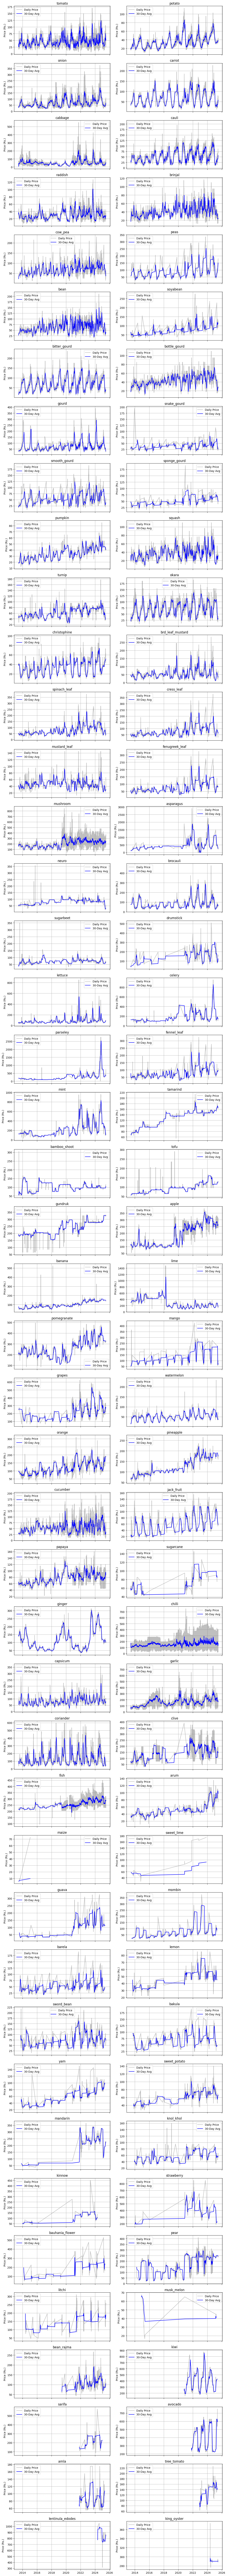

In [589]:
import matplotlib.pyplot as plt
import pandas as pd


# List of unique items
items = df_final['name'].unique()

# Plot each item in subplots
import math
plots_per_row = 2
row_count = math.ceil(len(items) / plots_per_row)

fig, axes = plt.subplots(nrows=row_count, ncols=plots_per_row, figsize=(plots_per_row * 6, row_count * 3), sharex=True)
axes = axes.flatten()

for i, item in enumerate(items):
    ax = axes[i]
    item_data = df_final[df_final['name'] == item].sort_values('date')

    ax.plot(item_data['date'], item_data['average'], color='gray', alpha=0.5, label='Daily Price')

    # Optional: Add a 30-day rolling average line
    item_data['rolling'] = item_data['average'].rolling(window=30, min_periods=1).mean()
    ax.plot(item_data['date'], item_data['rolling'], color='blue', label='30-Day Avg')

    ax.set_title(item)
    ax.set_ylabel('Price (Rs.)')
    ax.grid(True)
    ax.legend()

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
